In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
from IPython.display import Image, Video

# 介绍

Numpy 提供多维数组对象以及一些列操作数组的函数，可以说其几乎是每一个Python科学计算软件的基础库

In [4]:
import numpy as np

Numpy 的核心数据结构是ndarray，它用来存储具有相同数据类型的多维数组，除了数据，ndarray也包含数组的 shape, size, ndim, nbytes, dtype

In [5]:
np.ndarray

In [7]:
d0 = np.array([[1, 2], [3, 4]])

In [8]:
d0

array([[1, 2],
       [3, 4]])

In [44]:
d0.strides            # int32 一个数字占用4个字节，即32bits

(8, 4)

In [9]:
type(d0), d0.shape, d0.size, d0.ndim, d0.dtype, d0.nbytes

(numpy.ndarray, (2, 2), 4, 2, dtype('int32'), 16)

为什么需要 numpy ?  速度快！简单！粗略比较一下速度

In [11]:
a0 = np.arange(10000)

In [12]:
t0 = %timeit -o [i**2 for i in a0]

2.53 ms ± 38.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
a1 = np.arange(10000)

In [14]:
t1 = %timeit -o a1**2

The slowest run took 4.20 times longer than the fastest. This could mean that an intermediate result is being cached.
17.5 µs ± 10.5 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
t0.best

0.0024807522100036296

In [16]:
t1.best

8.888999218470417e-06

In [17]:
t0.best/t1.best

279.08115964830824

# 数据类型

详细参考：[numpy datatypes](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).


In [18]:
x = np.array([1, 2])   # Let numpy choose the datatype

In [19]:
y = np.array([1.0, 2.0])   # Let numpy choose the datatype

In [20]:
z = np.array([1, 2], dtype = np.int64)    # Force a particula datatype

In [21]:
print(x.dtype, y.dtype, z.dtype)

int32 float64 int64


In [22]:
z.nbytes * 8  # nbits

128

In [23]:
x1 = x + 0.3

In [24]:
print(x1, x1.dtype)

[1.3 2.3] float64


In [25]:
z[0] = 3.5

In [27]:
z

array([3, 2], dtype=int64)

如何使用类型：一般指定int, float, complex即可，不需要细分int16, int32等

In [28]:
np.sqrt([-1, 2, 3])

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([       nan, 1.41421356, 1.73205081])

In [29]:
np.sqrt([-1, 2, 3], dtype = np.complex)

array([0.        +1.j, 1.41421356+0.j, 1.73205081+0.j])

# 存储顺序

多维数组在内存中是连续储存的，本质上可以看成是一维的，如何将内存中数据映射到多维数组中取决于数组是按行存储的还是按列存储的，例如有四个整数1,2,3,4，那么：

* 按行存储就是：[[1, 2], [3, 4]]
* 按列存储就是：[[1, 3], [2, 4]]

Fotran是按列存储的，C是按行存储的

In [30]:
a = np.arange(6, dtype = np.int8)

In [31]:
a

array([0, 1, 2, 3, 4, 5], dtype=int8)

In [32]:
a1 = a.reshape(2, 3, order = 'F')

In [33]:
a1

array([[0, 2, 4],
       [1, 3, 5]], dtype=int8)

In [34]:
a2 = a.reshape(2, 3)

In [35]:
a2

array([[0, 1, 2],
       [3, 4, 5]], dtype=int8)

什么时候需要考虑存储顺醋？

跟其他语言交互的时候，比如调用 Fotran(Numpy, Scipy中很多数值，就是调用 Fortran 的, Anaconda 现在默认使用 intel mkl 也是 Fotran 的)，但是平常使用不需要关心顺序

Numpy 中使用 ndarray.strides 确定映射的顺序

In [36]:
a1.strides

(1, 2)

In [43]:
a1.nbytes      # int8 一个数字占用1个字节，即8bits

6

In [37]:
a2.strides

(3, 1)

strides 确定对应维度移动一个元素应移动内存中的字节数，如对应a1，有（1x1, 2x1）,对应a2, 有（3x1, 1x1）

某些操作，如 transpose, reshape, 只需改变 strides 即可

In [38]:
a = np.random.rand(10, 3)

In [39]:
a

array([[0.00283386, 0.13501362, 0.626553  ],
       [0.53936605, 0.89154132, 0.81665166],
       [0.39947829, 0.8553083 , 0.31003782],
       [0.37247447, 0.56663778, 0.25497758],
       [0.48940761, 0.96626806, 0.7713544 ],
       [0.50763438, 0.8832438 , 0.56446482],
       [0.1391794 , 0.12520857, 0.91446778],
       [0.06045268, 0.77184215, 0.2634522 ],
       [0.63758174, 0.92276964, 0.3254768 ],
       [0.98232069, 0.02868435, 0.51891138]])

In [40]:
a.strides            # float64 一个数字占用8个字节，即64bits

(24, 8)

In [41]:
a.dtype

dtype('float64')

In [42]:
a.nbytes              # 240/30=8 即一个数字占用8个字节，即64bits

240

In [45]:
b = a.transpose()

In [46]:
b

array([[0.00283386, 0.53936605, 0.39947829, 0.37247447, 0.48940761,
        0.50763438, 0.1391794 , 0.06045268, 0.63758174, 0.98232069],
       [0.13501362, 0.89154132, 0.8553083 , 0.56663778, 0.96626806,
        0.8832438 , 0.12520857, 0.77184215, 0.92276964, 0.02868435],
       [0.626553  , 0.81665166, 0.31003782, 0.25497758, 0.7713544 ,
        0.56446482, 0.91446778, 0.2634522 , 0.3254768 , 0.51891138]])

In [47]:
b.strides

(8, 24)

In [48]:
b.dtype

dtype('float64')

In [49]:
b.nbytes

240

In [50]:
np.shares_memory(a, b)

True

In [51]:
c = a.reshape(3, 10)

In [52]:
c

array([[0.00283386, 0.13501362, 0.626553  , 0.53936605, 0.89154132,
        0.81665166, 0.39947829, 0.8553083 , 0.31003782, 0.37247447],
       [0.56663778, 0.25497758, 0.48940761, 0.96626806, 0.7713544 ,
        0.50763438, 0.8832438 , 0.56446482, 0.1391794 , 0.12520857],
       [0.91446778, 0.06045268, 0.77184215, 0.2634522 , 0.63758174,
        0.92276964, 0.3254768 , 0.98232069, 0.02868435, 0.51891138]])

In [53]:
np.shares_memory(a, c)

True

# 帮助

In [54]:
np.array?

In [55]:
np.con*?

In [56]:
>>> np.array([[1, 2], [3, 4]])

array([[1, 2],
       [3, 4]])

google: numpy add a row

# 数组创建

## 从列表创建

In [58]:
a = np.array([[1, 2, 3], [4, 5, 6]])

In [59]:
b = np.array([1, 2, 3])

In [60]:
a

array([[1, 2, 3],
       [4, 5, 6]])

In [61]:
b

array([1, 2, 3])

In [62]:
print("a:", a.shape, a.size, type(a), np.ndim(a))

a: (2, 3) 6 <class 'numpy.ndarray'> 2


In [64]:
print("b:", b.shape, b.size, type(b), np.ndim(b))

b: (3,) 3 <class 'numpy.ndarray'> 1


In [65]:
len(a), len(b)    # 返回第一个维度的长度

(2, 3)

In [67]:
np.array([i for i in range(10) if i % 2 == 0])

array([0, 2, 4, 6, 8])

In [68]:
a, a.shape[0], len(a)

(array([[1, 2, 3],
        [4, 5, 6]]), 2, 2)

# 使用Numpy函数创建

In [69]:
np.zeros(2, 3)    # create an array of all zeros

TypeError: data type not understood

In [70]:
np.zeros((2, 3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [71]:
np.ones((5, 5))        # Create an array of all ones

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [72]:
np.full((2, 2), 7)     # Create a constant array

array([[7, 7],
       [7, 7]])

In [74]:
np.eye(2)             # Create a 2x2 identity matrix

array([[1., 0.],
       [0., 1.]])

In [75]:
np.random.random((2, 2))      # Create an array filled with random values

array([[0.22742624, 0.65087011],
       [0.40348979, 0.6081841 ]])

In [80]:
np.arange(9).reshape(3, -1)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [81]:
np.linspace(0, 1.0, 10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [82]:
np.tril(np.arange(9).reshape(3, -1))   # np.triu 下三角

array([[0, 0, 0],
       [3, 4, 0],
       [6, 7, 8]])

In [83]:
np.random.rand(3, 3)

array([[0.92031029, 0.26391894, 0.83026805],
       [0.42615202, 0.90236651, 0.20580675],
       [0.38270805, 0.54332445, 0.90729721]])

# 从文件读取

In [87]:
#!head test.dat

In [88]:
#!wc test.dat

In [89]:
#a = np.genfromtxt("test.dat", delimiter = ",", comments = "#")

In [90]:
# 保存数组到可读文件
np.savetxt("test.dat", np.random.random((1000, 5)), delimiter = ",", header = "show how to save array dat.\n a simple example")

In [91]:
# 保存二进制文件
np.savetxt("test.npy", np.random.random((1000, 5)))

In [92]:
a = np.genfromtxt("test.dat", delimiter = ",", comments = "#")

In [93]:
a[:10], a.shape

(array([[0.2719304 , 0.52571059, 0.11972818, 0.0587999 , 0.23120044],
        [0.65888666, 0.93834906, 0.4963248 , 0.03952929, 0.30933798],
        [0.87208644, 0.2608806 , 0.73243215, 0.22593159, 0.74440652],
        [0.98834119, 0.93704813, 0.61662364, 0.11594722, 0.70428613],
        [0.94027864, 0.5819661 , 0.86986239, 0.02001472, 0.46351165],
        [0.46665611, 0.90897174, 0.9368438 , 0.41316755, 0.63665552],
        [0.45287453, 0.64127649, 0.75256015, 0.10798138, 0.27574283],
        [0.98177473, 0.80250093, 0.71689298, 0.65360774, 0.18679547],
        [0.35068318, 0.96485702, 0.12257129, 0.72390262, 0.09720899],
        [0.36190275, 0.31236799, 0.3357832 , 0.01496788, 0.3744564 ]]),
 (1000, 5))

In [120]:
# 读取大文件
def generate_text_file(length = 1e6, ncols = 20):
    data = np.random.random((int(length), int(ncols)))
    np.savetxt('large_text_file.csv', data, delimiter = ',')

In [121]:
def iter_loadtxt(filename, delimiter = ',', skiprows = 0, dtype = float):
    def iter_func():
        with open(filename, 'r') as infile:
            for _ in range(skiprows):
                next(infile)
            for line in infile:
                line = line.rstrip().split(delimiter)
                for item in line:
                    yield dtype(item)
        iter_loadtxt.rowlength = len(line)
    
    data = np.fromiter(iter_func(), dtype = dtype)
    data = data.reshape((-1, iter_loadtxt.rowlength))
    return data

In [122]:
#generate_text_file()     # 477M

In [123]:
%time data = np.genfromtxt('large_text_file.csv', delimiter = "r")

Wall time: 10.8 s


In [124]:
%time data = iter_loadtxt('large_text_file.csv')

Wall time: 18.4 s


In [125]:
%time data = pd.read_csv('large_text_file.csv')

Wall time: 33.1 s


# 索引与切片

In [126]:
a = np.array([[i + j for j in range(6)] for i in range(0, 60, 10)])

In [127]:
a

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

In [128]:
[[i + j for j in range(6)] for i in range(0, 60, 10)]

[[0, 1, 2, 3, 4, 5],
 [10, 11, 12, 13, 14, 15],
 [20, 21, 22, 23, 24, 25],
 [30, 31, 32, 33, 34, 35],
 [40, 41, 42, 43, 44, 45],
 [50, 51, 52, 53, 54, 55]]

In [131]:
[[i] for i in range(0, 60, 10)]

[[0], [10], [20], [30], [40], [50]]

In [133]:
[j for j in range(6)]

[0, 1, 2, 3, 4, 5]

In [129]:
np.repeat(range(5), 5)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4])

In [130]:
np.arange(6) + np.arange(0, 60, 10).reshape(6, -1)

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

In [134]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

In [135]:
np.arange(0, 60, 10)

array([ 0, 10, 20, 30, 40, 50])

In [139]:
np.arange(0, 60, 10).reshape(6, -1)

array([[ 0],
       [10],
       [20],
       [30],
       [40],
       [50]])

# 索引（indexing）

In [140]:
print(a[0, 0], a[1, 2], a[2, 2])

0 12 22


In [141]:
a[0, 2] = 3

In [142]:
a

array([[ 0,  1,  3,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

# 切片（Slicing）

In [143]:
a[:, 0], a[1, :], a[[1], :]   # 第1列，第2行， 第2行

(array([ 0, 10, 20, 30, 40, 50]),
 array([10, 11, 12, 13, 14, 15]),
 array([[10, 11, 12, 13, 14, 15]]))

In [144]:
a[0, 3:5]         # 第1行的第4到第5列

array([3, 4])

In [145]:
a[4:, 4:]     # 第5行到最后一行的第5列到最后一列

array([[44, 45],
       [54, 55]])

In [146]:
a[:, 2]       # 第3列

array([ 3, 12, 22, 32, 42, 52])

In [147]:
a[2::2, ::2]     # 第3行到最后一行，相隔2行，全部列，相隔2列

array([[20, 22, 24],
       [40, 42, 44]])

# 整数数组索引（fancing index）

In [148]:
a[[1, 3], :]     # 第2和第4行

array([[10, 11, 12, 13, 14, 15],
       [30, 31, 32, 33, 34, 35]])

In [149]:
a[[1, 3], :] = 5    # 第2和第4行元素全部赋值为5

In [150]:
a

array([[ 0,  1,  3,  3,  4,  5],
       [ 5,  5,  5,  5,  5,  5],
       [20, 21, 22, 23, 24, 25],
       [ 5,  5,  5,  5,  5,  5],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

# 条件索引

In [159]:
a = np.random.random(10) * 2 + -1   # random with (-1, 1) 

In [160]:
a

array([ 0.27572072,  0.67911824,  0.96661859,  0.38564733, -0.28006443,
       -0.21555975,  0.24844754, -0.07961691,  0.95508211,  0.28826445])

In [161]:
np.random.random(10)

array([0.37848226, 0.87549838, 0.5439149 , 0.18378417, 0.94928359,
       0.75246312, 0.44350516, 0.42900504, 0.97409283, 0.43517004])

In [162]:
np.random.random(10) * 2

array([1.87117603, 1.56393316, 1.62041229, 1.82198906, 1.59167445,
       0.57276582, 1.11060833, 1.51926414, 0.17246444, 1.53413159])

In [163]:
np.random.random(10) * 2 + -1

array([ 0.39357306, -0.5467526 , -0.90968923, -0.33416211, -0.96217207,
       -0.34966365,  0.37695263,  0.48692876,  0.83662179, -0.6093016 ])

In [164]:
a[a > 0.3] = 20

In [165]:
a > 0.3, a

(array([False,  True,  True,  True, False, False, False, False,  True,
        False]),
 array([ 0.27572072, 20.        , 20.        , 20.        , -0.28006443,
        -0.21555975,  0.24844754, -0.07961691, 20.        ,  0.28826445]))

In [166]:
a

array([ 0.27572072, 20.        , 20.        , 20.        , -0.28006443,
       -0.21555975,  0.24844754, -0.07961691, 20.        ,  0.28826445])

# copies and view

In [167]:
a = np.arange(10)

In [168]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [169]:
b = a[::2]

In [170]:
b

array([0, 2, 4, 6, 8])

In [171]:
b1 = a[5:]

In [172]:
b1

array([5, 6, 7, 8, 9])

In [173]:
c = a.copy()

In [174]:
c

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [175]:
np.may_share_memory(a, b)

True

In [176]:
np.may_share_memory(a, c)

False

In [177]:
np.may_share_memory(a, b1)

True

In [179]:
np.may_share_memory(b, b1)

True

In [180]:
a.base is c

False

In [181]:
b.base is a

True

In [182]:
b.base

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [183]:
print(c.base)

None


In [184]:
a = np.random.rand(5, 3)

In [185]:
a

array([[0.67452746, 0.08158801, 0.14116664],
       [0.68293938, 0.71120469, 0.55015901],
       [0.16790391, 0.41016577, 0.86507744],
       [0.79351252, 0.34233941, 0.12083158],
       [0.85334773, 0.62585854, 0.90777022]])

In [186]:
c = a.flatten()      # 展平   与a不共用一个内存，不同的base

In [187]:
c

array([0.67452746, 0.08158801, 0.14116664, 0.68293938, 0.71120469,
       0.55015901, 0.16790391, 0.41016577, 0.86507744, 0.79351252,
       0.34233941, 0.12083158, 0.85334773, 0.62585854, 0.90777022])

In [193]:
d = a.ravel()       # 展平  与a共用一个内存，同一个base

In [194]:
d

array([0.67452746, 0.08158801, 0.14116664, 0.68293938, 0.71120469,
       0.55015901, 0.16790391, 0.41016577, 0.86507744, 0.79351252,
       0.34233941, 0.12083158, 0.85334773, 0.62585854, 0.90777022])

In [190]:
d = 0

In [191]:
d

0

In [192]:
type(d)

int

In [195]:
d[:] = 0

In [196]:
d

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [197]:
a

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [198]:
c

array([0.67452746, 0.08158801, 0.14116664, 0.68293938, 0.71120469,
       0.55015901, 0.16790391, 0.41016577, 0.86507744, 0.79351252,
       0.34233941, 0.12083158, 0.85334773, 0.62585854, 0.90777022])

In [199]:
np.copy?

建议：当你不想改变原数组的时候使用 np.copy

# 数组操作

## 数学操作

In [200]:
x = np.random.random((3, 3))

In [201]:
y = np.random.random((3, 3))

In [202]:
print(x, '\n\n', y)

[[0.64869029 0.78637053 0.18455348]
 [0.86554127 0.88543859 0.74149242]
 [0.72047094 0.22173026 0.04461605]] 

 [[0.54416792 0.9755065  0.57760947]
 [0.22730817 0.06189512 0.92309429]
 [0.39028186 0.97557542 0.57549008]]


In [203]:
x + y, x* y, x/ y, x- y

(array([[1.19285821, 1.76187703, 0.76216295],
        [1.09284945, 0.94733372, 1.66458671],
        [1.1107528 , 1.19730568, 0.62010613]]),
 array([[0.35299645, 0.76710956, 0.10659984],
        [0.19674461, 0.05480433, 0.68446742],
        [0.28118674, 0.21631459, 0.02567609]]),
 array([[ 1.19207742,  0.80611511,  0.31951256],
        [ 3.80778772, 14.3054658 ,  0.80326834],
        [ 1.84602722,  0.22728152,  0.07752705]]),
 array([[ 0.10452237, -0.18913597, -0.39305599],
        [ 0.6382331 ,  0.82354347, -0.18160188],
        [ 0.33018908, -0.75384516, -0.53087403]]))

In [204]:
np.sin(x), np.sqrt(y)

(array([[0.60414325, 0.70779401, 0.18350762],
        [0.76144624, 0.77419267, 0.67538926],
        [0.65973865, 0.21991785, 0.04460125]]),
 array([[0.73767738, 0.98767733, 0.76000623],
        [0.47676847, 0.24878731, 0.96077796],
        [0.62472543, 0.98771221, 0.75861063]]))

In [205]:
x@y, x.dot(y)     # 矩阵乘法， x.dot(x) in Py2

(array([[0.60377277, 0.86151994, 1.2067925 ],
        [0.96165826, 1.62252725, 1.74400968],
        [0.45987111, 0.76007443, 0.64650487]]),
 array([[0.60377277, 0.86151994, 1.2067925 ],
        [0.96165826, 1.62252725, 1.74400968],
        [0.45987111, 0.76007443, 0.64650487]]))

In [206]:
x.T, x.T.T   # 转置

(array([[0.64869029, 0.86554127, 0.72047094],
        [0.78637053, 0.88543859, 0.22173026],
        [0.18455348, 0.74149242, 0.04461605]]),
 array([[0.64869029, 0.78637053, 0.18455348],
        [0.86554127, 0.88543859, 0.74149242],
        [0.72047094, 0.22173026, 0.04461605]]))

In [207]:
dir(x)      # return the attributes of the object x

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_e

# aggregate funtion

In [208]:
z = np.arange(6).reshape(2, 3)

In [209]:
z

array([[0, 1, 2],
       [3, 4, 5]])

In [210]:
np.max(z), np.max(z, axis = 0), np.max(z, axis = 1)   # 0轴沿着竖向方向，1轴沿着横向方向

(5, array([3, 4, 5]), array([2, 5]))

In [211]:
z.shape

(2, 3)

In [213]:
np.sum(z), np.sum(z, axis = 0), np.sum(z, axis = 1)  

(15, array([3, 5, 7]), array([ 3, 12]))

# Numpy axis

In [214]:
a = np.arange(21)

In [215]:
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [216]:
b = a.reshape(3, 7)

In [217]:
b

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20]])

In [218]:
np.sum(b, axis = 0)

array([21, 24, 27, 30, 33, 36, 39])

In [220]:
a = np.random.rand(10, 9, 7)     # 0轴为10维，1轴为9维，2轴为7维的三维数组

In [226]:
a

array([[[0.73455699, 0.19111769, 0.44441452, 0.65059959, 0.62260856,
         0.35479031, 0.83047645],
        [0.29510573, 0.49312857, 0.38310771, 0.46257806, 0.70153844,
         0.19047236, 0.26970224],
        [0.2489991 , 0.23297403, 0.05887229, 0.46027078, 0.54576834,
         0.18397249, 0.03726223],
        [0.52392982, 0.93368221, 0.12337408, 0.40780636, 0.22937799,
         0.68200546, 0.26537855],
        [0.83959241, 0.31227635, 0.75668336, 0.69832842, 0.53220561,
         0.40119178, 0.94625419],
        [0.1560213 , 0.21568433, 0.82558932, 0.81352507, 0.53770423,
         0.11320655, 0.17148947],
        [0.50566528, 0.5489729 , 0.54726814, 0.83266115, 0.20550112,
         0.3733766 , 0.970855  ],
        [0.23179153, 0.61940897, 0.24293732, 0.57308879, 0.9461856 ,
         0.04077015, 0.87166993],
        [0.56539701, 0.40707353, 0.11179821, 0.98408356, 0.91868344,
         0.86207079, 0.84177002]],

       [[0.16226307, 0.47361083, 0.79932561, 0.20253629, 0.18433102,
  

In [222]:
a.shape

(10, 9, 7)

In [224]:
a.sum(axis = 2).shape      # 沿着2轴方向相加，2轴上的7个元素相加得到一个数，相当于从侧面看

(10, 9)

In [225]:
a.sum(axis = 2)       # 比如 （0,0）元素是 a 的第一行元素全部加起来

array([[3.82856411, 2.79563312, 1.76811927, 3.16555446, 4.48653212,
        2.83322027, 3.9843002 , 3.52585229, 4.69087657],
       [2.86959088, 2.81822663, 3.08497687, 2.83777513, 2.62085616,
        4.17259248, 3.3258397 , 2.28116746, 2.96804377],
       [3.07067189, 3.00638597, 3.14196347, 3.03407787, 3.5528748 ,
        4.12836601, 4.08550351, 3.60816028, 2.53871038],
       [2.96505954, 2.75706561, 3.20393977, 2.64373191, 2.49433526,
        4.00201894, 3.76880475, 3.62297403, 2.82255741],
       [3.43123576, 4.05250218, 3.10771837, 3.82932517, 2.88490455,
        3.14845689, 2.9960748 , 2.5152428 , 4.88550368],
       [4.76296698, 3.6657527 , 2.1056921 , 3.32044066, 4.16265217,
        3.41015669, 2.92627467, 3.04589547, 3.81914058],
       [2.82581682, 2.70613228, 3.44968346, 3.04870597, 2.22700591,
        2.95709072, 4.26569919, 2.810079  , 4.85215287],
       [4.37059148, 3.85411671, 3.18649255, 3.59404484, 3.54976937,
        2.99013201, 2.92302185, 3.70649652, 3.6168741 ],


In [227]:
a.sum(axis = 1)      

array([[4.10105918, 3.95431859, 3.49404494, 5.88294179, 5.23957332,
        3.20185649, 5.20485809],
       [2.58565757, 3.31090444, 4.13936769, 4.74409356, 4.71063911,
        3.24482849, 4.24357823],
       [4.24996594, 5.45212067, 5.64716866, 4.66853545, 3.89758659,
        2.61643243, 3.63490443],
       [3.61237045, 4.65474308, 2.38703012, 4.99424666, 5.06790769,
        3.40985114, 4.15433808],
       [3.86688175, 4.80869329, 5.16433345, 5.55937133, 4.67590723,
        3.4122759 , 3.36350126],
       [4.97587258, 3.98496841, 6.13181639, 4.64278894, 3.36085239,
        3.54541006, 4.57726325],
       [4.10140791, 3.7392942 , 5.41235454, 4.61965588, 4.26380057,
        3.38986643, 3.61598669],
       [4.00906897, 5.28404374, 3.79328461, 5.05637623, 2.81829679,
        5.03655808, 5.79391099],
       [3.43153557, 3.20584332, 3.91321751, 5.20398799, 4.05739953,
        4.59620926, 4.46992379],
       [4.35524197, 4.60334173, 4.99611995, 4.55288543, 4.14549681,
        4.16068597, 4.3

In [229]:
a.sum(axis = 1).shape      # 沿着1轴方向将元素加起来

(10, 7)

In [230]:
a.sum(axis = 0).shape     # 沿着0轴方向将元素加起来

(9, 7)

In [231]:
a.sum(axis = 0)

array([[5.22203463, 3.81535962, 4.53820447, 6.44152218, 5.06608183,
        4.58586848, 4.79624617],
       [4.05966825, 5.25452723, 5.10390448, 4.75755918, 5.99790862,
        2.47614771, 3.85419491],
       [3.71904392, 4.47662971, 4.40689667, 4.47211084, 3.91577464,
        4.81836856, 6.2768081 ],
       [3.7079396 , 6.2107571 , 4.66551536, 5.37108491, 4.32401246,
        3.81883496, 3.32954075],
       [4.90279328, 4.90816685, 4.50334887, 4.38645668, 4.38125881,
        5.52116142, 4.24126947],
       [3.93383072, 3.89168942, 6.39320266, 5.90741328, 3.88211903,
        4.61077596, 5.40643887],
       [5.12708361, 5.23000736, 5.52791096, 7.13863889, 4.20009691,
        2.46973773, 5.90512278],
       [4.51833783, 4.24009005, 5.22480338, 4.74007238, 5.17575871,
        3.22850824, 5.05456683],
       [4.09833005, 4.97104414, 4.71495101, 6.71002493, 5.29444901,
        5.08457119, 4.51952252]])

# 条件表达式

In [232]:
a = np.random.random(10) * 2 + -1   # random with (-1, 1)

In [233]:
a

array([ 0.33600077,  0.33245217, -0.7581004 ,  0.77822634,  0.58246941,
       -0.44679675, -0.82113218, -0.95950046,  0.41777481,  0.74045237])

In [234]:
np.where(a > 0.3)

(array([0, 1, 3, 4, 8, 9], dtype=int64),)

In [235]:
np.where((a > 0.3) & (np.sin(a) > 0.6))

(array([3, 9], dtype=int64),)

In [236]:
a[np.where((a > 0.3) & (np.sin(a) > 0.6))]

array([0.77822634, 0.74045237])

In [237]:
np.select([a > 0, a < 0], [a, a * -1])     

array([0.33600077, 0.33245217, 0.7581004 , 0.77822634, 0.58246941,
       0.44679675, 0.82113218, 0.95950046, 0.41777481, 0.74045237])

np.select(condlist, choicelist, default=0)<br/>
condlist=[a>0, a<0], choicelist=[a,a* -1]<br/>
当a>0,选择a<br/>
当a<0,选择-a<br/>
这个相当于做了一个绝对值操作<br/>

In [238]:
a = np.random.rand(2, 3)

In [239]:
a

array([[0.61713358, 0.44554751, 0.61276107],
       [0.01891521, 0.20591299, 0.26043589]])

In [240]:
a[np.where(a > 0.5)] = 10

In [241]:
a

array([[10.        ,  0.44554751, 10.        ],
       [ 0.01891521,  0.20591299,  0.26043589]])

In [242]:
np.where(a > 0.5)

(array([0, 0], dtype=int64), array([0, 2], dtype=int64))

# Broadcasting(广播)

In [248]:
a = np.tile(np.arange(0, 40, 10), (3, 1)).T     # reps=(3, 1)在每个轴上重复的次数

In [249]:
a

array([[ 0,  0,  0],
       [10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

In [250]:
np.tile(np.arange(0, 40, 10), (3, 1))

array([[ 0, 10, 20, 30],
       [ 0, 10, 20, 30],
       [ 0, 10, 20, 30]])

In [251]:
np.tile(np.arange(0, 40, 10), (1, 3))

array([[ 0, 10, 20, 30,  0, 10, 20, 30,  0, 10, 20, 30]])

In [252]:
b = np.array([0, 1, 2])

In [253]:
b

array([0, 1, 2])

In [254]:
c = np.empty_like(a)

In [255]:
c

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [256]:
for i in range(a.shape[0]):
    c[i, :] = a[i, :] + b

In [257]:
c

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

In [258]:
print(a, "\n\n", c)

[[ 0  0  0]
 [10 10 10]
 [20 20 20]
 [30 30 30]] 

 [[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]


In [259]:
b1 = np.tile(b, (a.shape[0], 1))

In [260]:
b1

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

In [261]:
c = a + b1

In [262]:
c

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

In [263]:
print(a, "\n\n", a + b)

[[ 0  0  0]
 [10 10 10]
 [20 20 20]
 [30 30 30]] 

 [[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]


In [264]:
np.tile(b, (a.shape[0], 3))

array([[0, 1, 2, 0, 1, 2, 0, 1, 2],
       [0, 1, 2, 0, 1, 2, 0, 1, 2],
       [0, 1, 2, 0, 1, 2, 0, 1, 2],
       [0, 1, 2, 0, 1, 2, 0, 1, 2]])

In [265]:
c = a + b

In [266]:
c

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

In [267]:
print(a, "\n\n", c)

[[ 0  0  0]
 [10 10 10]
 [20 20 20]
 [30 30 30]] 

 [[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]


In [268]:
a

array([[ 0,  0,  0],
       [10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

In [276]:
a = np.arange(0, 40, 10)

In [277]:
a

array([ 0, 10, 20, 30])

In [278]:
a = a.reshape(4, 1)

In [279]:
a

array([[ 0],
       [10],
       [20],
       [30]])

In [273]:
#a = a[:, np.newaxis]

In [274]:
#a

array([[[ 0]],

       [[10]],

       [[20]],

       [[30]]])

In [275]:
#a.shape

(4, 1, 1)

In [280]:
b = np.array([0, 1, 2])

In [281]:
b

array([0, 1, 2])

In [282]:
c = a + b

In [283]:
c

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

In [285]:
print(a, "\n\n", b, "\n\n", c)

[[ 0]
 [10]
 [20]
 [30]] 

 [0 1 2] 

 [[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]


In [286]:
a * b   

array([[ 0,  0,  0],
       [ 0, 10, 20],
       [ 0, 20, 40],
       [ 0, 30, 60]])

# 数组形状操作

In [287]:
a = np.array([[1, 2, 3], [4, 5, 6]])

In [288]:
a

array([[1, 2, 3],
       [4, 5, 6]])

In [289]:
print(a.ravel(), "\n\n", a.flatten())

[1 2 3 4 5 6] 

 [1 2 3 4 5 6]


In [291]:
a.flatten?

In [292]:
a.reshape(-1)

array([1, 2, 3, 4, 5, 6])

In [300]:
a.reshape(2, -1)

array([[1, 2, 3],
       [4, 5, 6]])

In [301]:
a.reshape(2, 3)         #  a.reshape 改变原数组

array([[1, 2, 3],
       [4, 5, 6]])

In [302]:
a

array([[1, 2, 3],
       [4, 5, 6]])

In [303]:
a = np.array([[1, 2], [3, 4]])

In [304]:
a

array([[1, 2],
       [3, 4]])

In [305]:
b = np.array([[5, 6]])

In [306]:
b

array([[5, 6]])

In [307]:
np.concatenate((a, b), axis = 0)     # 沿着0轴添加信息

array([[1, 2],
       [3, 4],
       [5, 6]])

In [308]:
np.concatenate((a, b.T), axis = 1)    # 沿着1轴添加信息，注意b需要转置

array([[1, 2, 5],
       [3, 4, 6]])

In [311]:
np.append        # 在数组后添加数组，可以指定所沿方向的轴

<function numpy.lib.function_base.append(arr, values, axis=None)>

In [312]:
a1 = np.arange(4)

In [313]:
a1

array([0, 1, 2, 3])

In [314]:
b1 = a1 + 2

In [315]:
b1

array([2, 3, 4, 5])

In [316]:
c1 = a1 + 3

In [317]:
c1

array([3, 4, 5, 6])

In [318]:
a1, b1, c1

(array([0, 1, 2, 3]), array([2, 3, 4, 5]), array([3, 4, 5, 6]))

In [319]:
np.vstack((a1, b1, c1))     # 沿着竖向组合

array([[0, 1, 2, 3],
       [2, 3, 4, 5],
       [3, 4, 5, 6]])

In [320]:
np.hstack((a1, b1, c1))        # 沿着横向组合

array([0, 1, 2, 3, 2, 3, 4, 5, 3, 4, 5, 6])

In [321]:
np.hstack??

In [322]:
a = np.array((1, 2, 3))

In [323]:
b = np.array((2, 3, 4))

In [324]:
np.hstack((a, b))

array([1, 2, 3, 2, 3, 4])

In [325]:
np.vstack((a, b))

array([[1, 2, 3],
       [2, 3, 4]])

# 例子

## 康威生命游戏

1. 当前细胞为存存活状态时，当周围低于2个（不包含2个）存活细胞时，该细胞变成死亡状态。（模拟生命数量稀少）
2. 当前细胞为存活状态时，当周围有2个或3个存活细胞时，该细胞保持原样。
3. 当前细胞为存活状态时，当周围有3个以上的存活细胞时，该细胞变成死亡状态。（模拟生命数量过多）
4. 当前细胞为死亡状态时，当周围有3个存活细胞时，该细胞变成存活状态。（模拟繁殖）

In [366]:
def compute_neighbours(Z):
    shape = len(Z[1]), len(Z[0])
    N = [[0,] * (shape[0]) for i in range(shape[1])]
    for x in range(1, shape[0] - 1):
        for y in range(1, shape[1] - 1):
            N[x][y] = Z[x - 1][y - 1] + Z[x][y - 1] + Z[x + 1][y - 1] \
                    + Z[x - 1][y]                   + Z[x + 1][y]     \
                    + Z[x - 1][y + 1] + Z[x][y + 1] + Z[x + 1][y + 1]
    return N

In [367]:
def iterate(Z):
    N = compute_neighbours(Z)
    shape = len(Z[1]), len(Z[0])
    for x in range(1, shape[0] - 1):
        for y in range(1, shape[1] - 1):
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
                Z[x][y] = 0
            elif Z[x][y] == 0 and N[x][y] == 3:
                Z[x][y] = 1
    return Z

In [368]:
Z = [[0, 1, 0, 0],
    [0, 0, 1, 0],
    [1, 1, 1, 0],
    [0, 0, 0, 0]]

In [369]:
len(Z)

4

In [370]:
len(Z[0])

4

In [371]:
shape = len(Z[1]), len(Z[0])

In [372]:
shape[0]

4

In [373]:
shape[1]

4

In [350]:
Z1 = np.zeros((6, 6), dtype = int)

In [351]:
Z1[1:-1, 1:-1] = Z

In [352]:
Z = Z1

In [353]:
Z

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

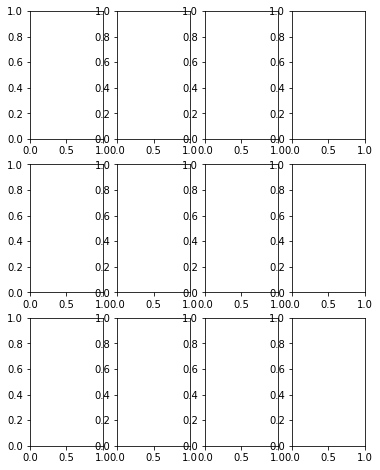

In [354]:
fig, axes = plt.subplots(3, 4, figsize = (6, 8))

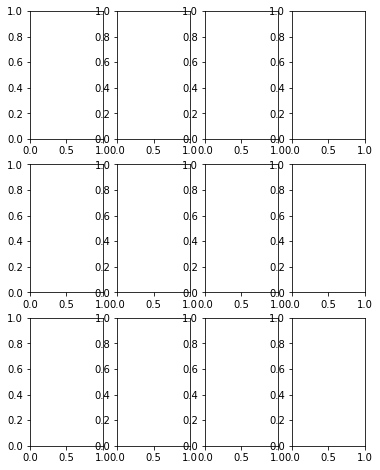

In [355]:
fig

In [356]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025780B34518>,
      dtype=object)

In [357]:
axes = axes.flatten()

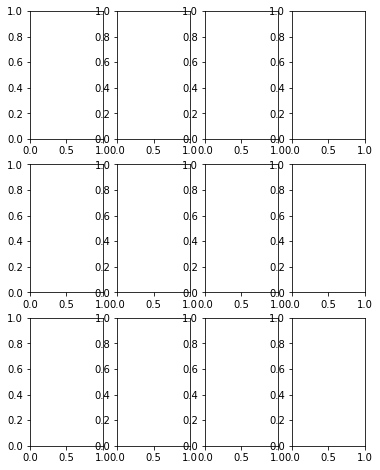

In [358]:
fig

In [359]:
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025780B34518>,
      dtype=object)

In [360]:
axes[0].matshow(Z, cmap = "Greys")

In [361]:
axes[0]

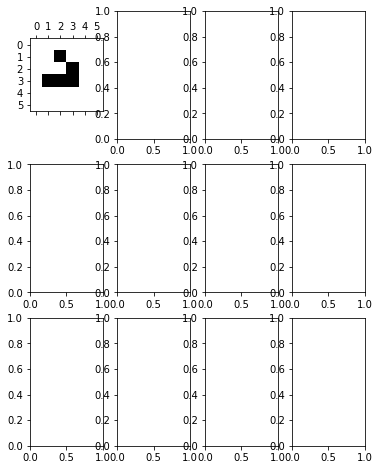

In [362]:
fig

In [363]:
axes[0].set_xlabel("iteration %s" % 0)

Text(0.5, 354.7357544757033, 'iteration 0')

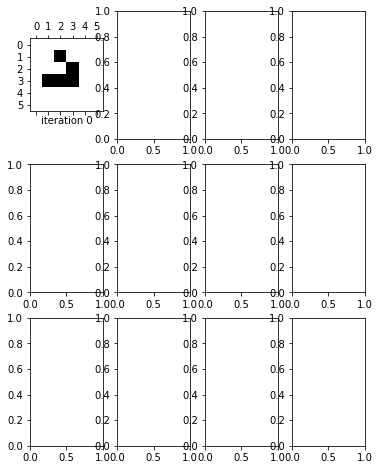

In [364]:
fig

In [344]:
for i in range(1, 12):
    Z = iterate(Z)
    axes[i].matshow(np.array(Z)[1:-1, 1:-1], cmap = "Greys")
    axes[i].set_xlabel("iteration %s" % i)

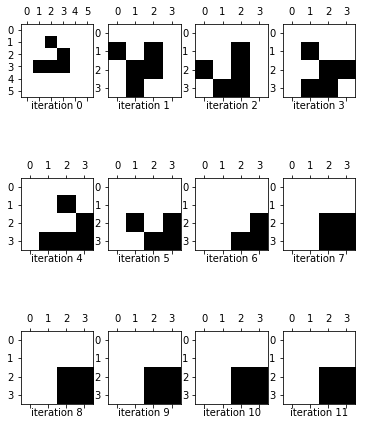

In [345]:
fig

# Numpy 实现 1 

In [430]:
Z = [[0, 1, 0, 0],
    [0, 0, 1, 0],
    [1, 1, 1, 0],
    [0, 0, 0, 0]]

In [431]:
Z1 = np.zeros((6, 6), dtype = int)

In [432]:
Z1[1:-1, 1:-1] = Z

In [433]:
Z = Z1

In [434]:
Z

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [435]:
N = np.zeros(Z.shape, dtype = int)

In [436]:
N

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [437]:
N[1:-1, 1:-1] += (Z[ :-2, :-2] + Z[ :-2, 1:-1] + Z[ :-2, 2:] +
                  Z[1:-1, :-2]                 + Z[1:-1, 2:] +
                  Z[2: , :-2] + Z[2: , 1:-1] + Z[2: , 2:])        
# 还有这种求细胞周围的方法！

In [438]:
N

array([[0, 0, 0, 0, 0, 0],
       [0, 1, 1, 2, 1, 0],
       [0, 3, 5, 3, 2, 0],
       [0, 1, 3, 2, 2, 0],
       [0, 2, 3, 2, 1, 0],
       [0, 0, 0, 0, 0, 0]])

In [439]:
# Flatten arrays

In [440]:
N_ = N.ravel()

In [441]:
N_

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 3, 5, 3, 2, 0, 0, 1, 3, 2,
       2, 0, 0, 2, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0])

In [442]:
Z_ = Z.ravel()

In [443]:
Z_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [444]:
# Apply rules

In [445]:
# 当前细胞为存活状态时，当周围低于2个（不包含2个）存活细胞时， 该细胞变成死亡状态。（模拟生命数量稀少）

In [446]:
R1 = np.argwhere((Z_ == 1) & (N_ < 2) )

In [447]:
R1

array([[ 8],
       [19]], dtype=int64)

In [448]:
# 当前细胞为存活状态时，当周围有3个以上的存活细胞时，该细胞变成死亡状态。（模拟生命数量过多）

In [449]:
R2 = np.argwhere((Z_ == 1) & (N_ > 3))

In [450]:
R2

array([], shape=(0, 1), dtype=int64)

In [451]:
# 当前细胞为存活状态时，当周围有2个或3个存活细胞时， 该细胞保持原样。

In [452]:
R3 = np.argwhere((Z_ == 1) & ((N_== 2) | (N_== 3)))

In [453]:
R3

array([[15],
       [20],
       [21]], dtype=int64)

In [454]:
# 当前细胞为死亡状态时，当周围有3个存活细胞时，该细胞变成存活状态。 （模拟繁殖）

In [455]:
R4 = np.argwhere((Z_ == 0) & (N_ == 3))

In [456]:
R4

array([[13],
       [26]], dtype=int64)

In [457]:
# Set new values

In [458]:
Z_[R1] = 0

In [459]:
Z_[R2] = 0

In [460]:
Z_[R3] = Z_[R3]

In [461]:
Z_[R4] = 1

In [462]:
# Make sure borders stay null

In [463]:
Z[0, :] = Z[-1, :] = Z[:, 0] = Z[:, -1] = 0

In [464]:
Z

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

# Numpy 实现 2 

In [465]:
Z = [[0, 1, 0, 0],
    [0, 0, 1, 0],
    [1, 1, 1, 0],
    [0, 0, 0, 0]]

In [466]:
Z1 = np.zeros((6, 6), dtype = int)

In [467]:
Z1[1: -1, 1:-1] = Z

In [468]:
Z = Z1

In [475]:
Z

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [469]:
N = np.zeros(Z.shape, dtype = int)

In [470]:
N[1:-1, 1:-1] += (Z[ :-2, :-2] + Z[ :-2, 1:-1] + Z[ :-2, 2:] +
                  Z[1:-1, :-2]                 + Z[1:-1, 2:] +
                  Z[2: , :-2] + Z[2: , 1:-1] + Z[2: , 2:])    

In [476]:
N

array([[0, 0, 0, 0, 0, 0],
       [0, 1, 1, 2, 1, 0],
       [0, 3, 5, 3, 2, 0],
       [0, 1, 3, 2, 2, 0],
       [0, 2, 3, 2, 1, 0],
       [0, 0, 0, 0, 0, 0]])

In [471]:
# 当前细胞为死亡状态时，当周围有3个存活细胞时，该细胞变成存活状态。 （模拟繁殖）

In [477]:
birth = (N == 3)[1:-1, 1:-1] & (Z[1:-1, 1:-1] == 0)

In [478]:
birth

array([[False, False, False, False],
       [ True, False, False, False],
       [False, False, False, False],
       [False,  True, False, False]])

In [473]:
# 当前细胞为存活状态时，当周围有2个或3个存活细胞时， 该细胞保持原样。

In [474]:
survive = ((N == 2) | (N == 3))[1:-1, 1:-1] & (Z[1:-1, 1:-1] == 1)

In [479]:
survive

array([[False, False, False, False],
       [False, False,  True, False],
       [False,  True,  True, False],
       [False, False, False, False]])

In [480]:
Z[...] = 0
Z

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [481]:
Z[1:-1, 1:-1][birth | survive] = 1

In [482]:
Z

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [483]:
Video("game-of-life.mp4")

ValueError: To embed videos, you must pass embed=True (this may make your notebook files huge)
Consider passing Video(url='...')